In [103]:
# Imports

import os
import datetime as dt
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

# Loading dataset

os.chdir(b"C:\Users\EDDAHABI\Documents\GitHub\ProjetISA\Team_Folder")
df = pd.read_csv('Code +Data/TrainSample.csv',sep=';',decimal=',')
df.head()

,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),Pressure_PPLS (PSI),...,Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft),GasCum360,OilCum360
0,661,0.429600,-0.193201,01/06/2013,21/03/2014,08/05/2014,-1.124200,-0.214336,-1.262296,-0.153197,...,0.635528,-0.067825,0.069978,-0.253698,-1.253690,0.181738,0.979100,-0.184434,-0.323593,-0.659768
1,523,-0.082672,-0.539854,31/08/2014,17/02/2015,03/08/2015,1.286521,0.870034,0.717834,0.674376,...,-1.364776,0.835789,1.136126,0.995649,0.667339,-0.560750,1.999634,-1.225036,-0.356343,1.782547
2,703,-0.457415,-0.082104,04/11/2013,08/07/2014,30/07/2014,-0.781945,0.511093,0.592495,-0.937430,...,0.667127,-0.287786,0.979602,-0.386425,-1.253690,0.181738,-0.492791,-0.181300,-1.067145,0.283035
3,473,0.376282,-0.310432,24/11/2011,11/05/2012,13/07/2012,-0.442801,0.025900,-1.093255,0.164815,...,0.033723,-1.034051,-1.342103,-1.546778,-0.293176,-1.303237,-0.295062,2.135885,-0.734454,-0.328650
4,309,-0.113110,-0.111412,20/11/2014,07/04/2015,23/07/2015,0.258511,0.190913,1.229474,-0.347126,...,-0.868364,0.923707,1.470667,0.561383,0.667339,-0.560750,2.034630,-1.226546,-0.271119,0.975603


# Introduction

In the intesrest of preparing our dataset in order to predict our target variables (_OilCum_ and _GasCum_), we will be leading our data analysis step by step, starting by doing a particularly common task in the exploratory phase : 
the detection of outliers.

We have written some **functions** for doing this task.

We will care about outliers for a couple of reasons:

1- We want to **understand** the data. However outliers distort the picture of the data we obtain using descriptive statistics and data visualization.

2- Outliers can be exactly hat we want to learn about, especially for tasks like anomaly detection.

3- Outliers hamper many machine learnig algorithms and statistical models. Since our goal is to **predict**, our models are often improved by ignoring outliers.

In the following, we will go through a few different ways of determining which observations in our dataset should be considered outliers, and when each is appropriate. The focus here is on **repeatability**. None of these recipes takes ous from raw data to an analysis - they all assume that the relevant data has been extracted, and is in the sensible format. We define 'sensible format' as a Python list containing all the observations of the variables on interest _OilCum_ and _GasCum_. Note that they ust be continuous, not categorical, for any of our **functions** make sense.

# A word of warning

None of these methods will deliver the objective truth about which of our dataset's observations are outliers, simply because there is no objective way of knowing whether something is truly an utlier or an honest-to-goodness datat point our future models should account for. It is a decision we must make subjectively, depending on the goals of our analysis (reasons explained above). 

In latest, we will show **two functions** and apply them to _OilCum_ and _GasCum_ as a first step and decide which of these methods is the most 'appropriate'.
Then we will apply the same thing for the remaining variables according to the method we will have stuck to by then.

# Methods 

### (implemented so far only on target variables)

The two methods we will go through here are the **MADe method**, and the **IQR(interquartile range) method**.

Here are two histograms showing the distribution of _OilCum_ and _GasCum_ :

Text(0.5,0,'Oil Cum')

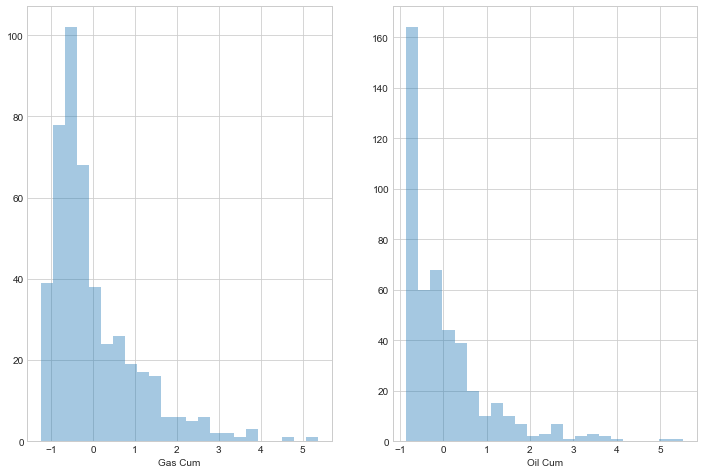

In [216]:
plt.figure(figsize=(12,8))
plt.subplot(121)
sns.distplot(df.GasCum360,kde=False)
plt.xlabel('Gas Cum')
plt.subplot(122)
sns.distplot(df.OilCum360,kde=False)
plt.xlabel('Oil Cum')
#plt.axis([10,14,0,180])

Clearly, here the distributions are non-normal, so we can apply those methods since there is no normality assumption. 

## MADe method

The MADe method, using the median and the Median Absolute Deviation (MAD), is one of the basic robust methods which are laergely unaffected by the presence of extreme values of the dataset.

In [208]:
def outliers_MADe(df,column):
    
    median = np.median(df[column])
    MADe = np.median(np.abs(df[column] - median))
    index = np.logical_or(df[column] > median + 2*MADe, df[column] < median - 2*MADe) 
    outliers = df[index]
    return outliers                                      

In [209]:
gas2 = outliers_MADe(df,'GasCum360')
gas2[['API','GasCum360']]  

,API,GasCum360
64,136,3.881936
70,649,3.221949
105,564,5.366269
127,365,4.647159
300,370,3.323647
364,92,3.560147
379,664,3.785963
412,119,3.775086


In [210]:
oil2 = outliers_MADe(df,'OilCum360')
oil2[['API','OilCum360']]  

,API,OilCum360
120,190,5.242229
332,618,5.527111
377,552,4.119965


The median and MAD are **robust** measures of central tendency an dispersion, respectively.

Since this approach uses two robust estimators having a high breakdown point, i.e., it is not unduly affected by extreme values even though a few observations make the distribution of the data skewed, the interval is seldom inflated.

## IQR method (Tukey's method)

Another robust method for labeling outliers is the IQR(interquartile range) method of outlier detection.

It uses a box-and-whisker plot to plot the shape of the data. The box represents the 1st and 3rd **quartiles**, and a line inside the box (median).

Let's plot again our _OilCum_ and _GasCum_ ditributions:

Text(0.5,0,'Oil Cum')

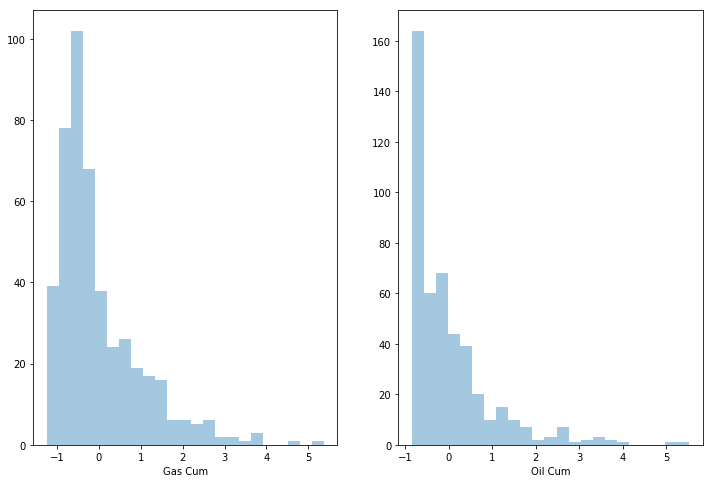

In [126]:
plt.figure(figsize=(12,8))
plt.subplot(121)
sns.distplot(df.GasCum360,kde=False)
plt.xlabel('Gas Cum')
plt.subplot(122)
sns.distplot(df.OilCum360,kde=False)
plt.xlabel('Oil Cum')
#plt.axis([10,14,0,180])

The interquartile range,which gives this method of outlier detection its name, is the range between the first and the third quartile (edges of the box), and this is for us the parameter that we should tune in order to find an appropriate way of distinguishing the candidates to be outliers.

For a normally distributed data we shall fix the range to IQR=1.35x _sigma_ as it will reveal more clearly the presence of an outlier when this one is outside the outer fence (95% of the normally distributed values are in, an alpha of 5% hence some outlier candidates).

In our situation we have two distributions that is more or less log-normal. So it occurs for us that computing the lower fence as Q1-(1.35xIQR) may not be the best way since our target variables are presumed to be lognormal. For that we can just log-transfom the data, but let's just stick to the norm above for the upper fence since we will apply the outlier **ESD Test** that requires only an upper bound.

In [166]:
def outliers_IQR(df,column):
    #quartiles
    Q1=np.percentile(df.dropna()[column],25)
    Q3=np.percentile(df.dropna()[column],75)
    iqr=Q3-Q1    
    #identify outliers
    mean=np.mean(df[column])
    index=np.logical_or(df[column]< Q1 - 2*1.35*iqr, df[column]> Q3 + 2*1.35*iqr)
    outliers=df[index]
    return outliers

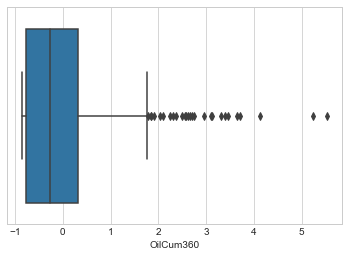

In [136]:
sns.set_style("whitegrid") 
sns.boxplot(x=df["OilCum360"],whis=1.35)

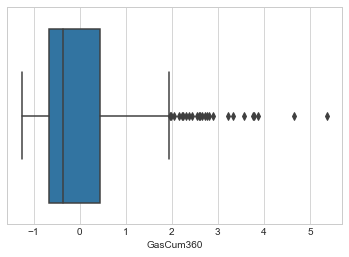

In [217]:
sns.set_style("whitegrid") 
sns.boxplot(x=df["GasCum360"],whis=1.35)

In [164]:
gas3 = outliers_IQR(df,'GasCum360')
gas3[['API','GasCum360']]  

,API,GasCum360
64,136,3.881936
105,564,5.366269
127,365,4.647159
364,92,3.560147
379,664,3.785963
412,119,3.775086


In [161]:
oil3 = outliers_IQR(df,'OilCum360')
oil3[['API','OilCum360']]  

,API,OilCum360
120,190,5.242229
332,618,5.527111
377,552,4.119965


Here we can compare our results with the visual box plot and see that there are some values that are clearly beyond the 2x1.35xIQR that is calculated in our function, but there are some values that are under the outer fence but still outside the inner fence, those we can see them from the boxplots.
Hence we need some other outlier tests to see wether we should keep those who are suspicious or just ignore them. But we will discuss that right after choosing the method that we will apply for the whole variables of our dataset.

## Discussion

It seems that like the modified Z-score method, the IQR method uses a **robust** measure of dispersion.

Here are the resultsof running each of these fucntions on our target variables:

**OilCum** :

_MADe_ : 120, 332 377

_IQR_ : 120, 332, 377

**GasCum** :

_MADe_ : 64, 70, 105, 127, 300, 364, 379, 412

_IQR_ : 64, 105, 127, 364, 379, 412

_MADe_ and _IQR_ give more or less the same results for both the variable _OilCum_ and _GasCum_ which means that they are **robust** methods.

We suggest to keep the **IQR method** for what is coming next since this one provides us with candidates from whom there are some clearly outside but some that are suspicious and then worth examination throughout formal tests ( we will show that after this part). It also offers a visualization that can help us determine the outliers according to our exploration interests.

The MADe method is also valid but we prefer not to use it because it increases in the percentage of outliers on the right side of the distribution as the skewness of the data increases. Since, the IQR boxplot takes into account the skewness of the target variables _OilCum_ ans _GasCum_, its right fene of the interval moves more to the side of the skewed tail, here the right side of the  distribution, as the skewness increases, which will lead us to be less sceptical about the suspicious values.

In the next chapter we will consolidate our outlier choises with formal tests.

# Formal statistical testing

## Generalized ESD Test for Outliers

The generalized (extreme Studentized deviate) ESD test is used to detect one or more outliers in a univariate dataset.


Given the upper bound, MAX, the generalized ESD test essentially performs MAX separate tests: a test for one outlier, a test for two outliers, and so on up to MAX outliers.